In [1]:
from pysmiles import read_smiles
import networkx as nx
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display

In [2]:
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
def calculate_determinant(smiles):
    # Read the SMILES string and create a molecular graph
    mol = read_smiles(smiles, explicit_hydrogen=True)
    
    # Convert the graph to a NumPy array
    skeleton = nx.to_numpy_array(mol, weight='order')
    
    # Get the elements from the graph
    elements = nx.get_node_attributes(mol, name="element")
    
    # Create an image
    #img = Draw.MolToImage(Chem.MolFromSmiles(smiles))

    # Display the image in Jupyter Notebook
    #display(img)
    # Determine the number of carbon atoms
    Nc = sum(value == 'C' for value in elements.values())
    
    # Initialize the hydrogen matrix
    hydrogen = np.zeros((Nc, Nc))
    
    # Compute the hydrogen matrix
    for i in range(Nc):
        hydrogen[i, i] = np.sum(skeleton[i, Nc:])
    
    # Compute the sum of the carbon and hydrogen matrices
    all_atoms = skeleton[:Nc, :Nc] + hydrogen
    
    # Calculate the determinant
    determinant = round(np.linalg.det(all_atoms))
    
    print(determinant)
    #print(all_atoms)
    return determinant#,all_atoms

In [18]:
def calculate_determinants(smiles_list):
    results = []  # 使用列表存储结果
    for smiles in smiles_list:
        determinant_value = calculate_determinant(smiles)
        results.append(determinant_value)  # 将行列式值追加到列表中
        print(determinant_value)
    return results


In [19]:
# Define the path to your file
file_path = 'smile_tot.txt'

# Initialize an empty list to hold the SMILES strings
smiles_list = []

# Open the file in read mode
with open(file_path, 'r') as file:
    # Iterate over each line in the file
    for line in file:
        # Strip the newline character and any leading/trailing whitespace
        smiles = line.strip()
        # Append the SMILES string to the list
        smiles_list.append(smiles)

# Now `smiles_list` contains all the SMILES strings from the file


In [20]:
len(smiles_list)

#print(type(smiles_list))

30673

In [21]:
det=calculate_determinants(smiles_list)

-2079
-1719
-3159
-2403
-1899
-3375
-2547
-2331
-3591
126
-270
-1269
-1485
90
234
-270
-1728
-459
-135
-1107
-4347
-4095
-567
-189
-225
-693
-1674
-1638
-693
-513
189
225
810
738
1008
792
-315
-1323
-819
-679
-1491
-4347
-4011
-441
-301
-861
-231
1431
1155
1713
1533
-990
-1086
-2430
-3510
-1998
-1638
-3318
-1152
-1368
225
441
441
945
693
-999
-1071
-819
9
-486
-135
-351
-1350
-387
-639
-891
-54
90
342
-9
207
27
207
567
459
738
1170
1098
-126
90
504
792
432
1197
-567
-651
-175
207
387
459
-486
-378
639
1059
851
-201
-129
1445
1725
1473
-702
-462
9
189
-783
-2754
-1107
1368
1872
306
810
105
357
-903
-1323
2093
2553
735
1431
-606
-270
-18
270
342
-234
90
-891
-531
-1215
-1179
-1395
-1719
-1008
-81
-1512
-153
-405
-531
-891
-891
-2610
81
-639
-378
-1818
-621
459
-405
-2514
117
-135
-939
-975
-162
-378
-1930
-2010
-345
-633
375
567
-81
-297
171
216
-135
-21
1293
-1215
405
63
-45
-144
-72
-99
-486
-369
-381
969
1053
-891
-891
513
-2079
-2259
-3159
-1998
-1674
-1746
-2430
-1746
-45
-567
-81
-

In [22]:
len(det)
#print(type(det2ring))


30673

In [23]:
kdegen=set(det)
len(kdegen)

2231

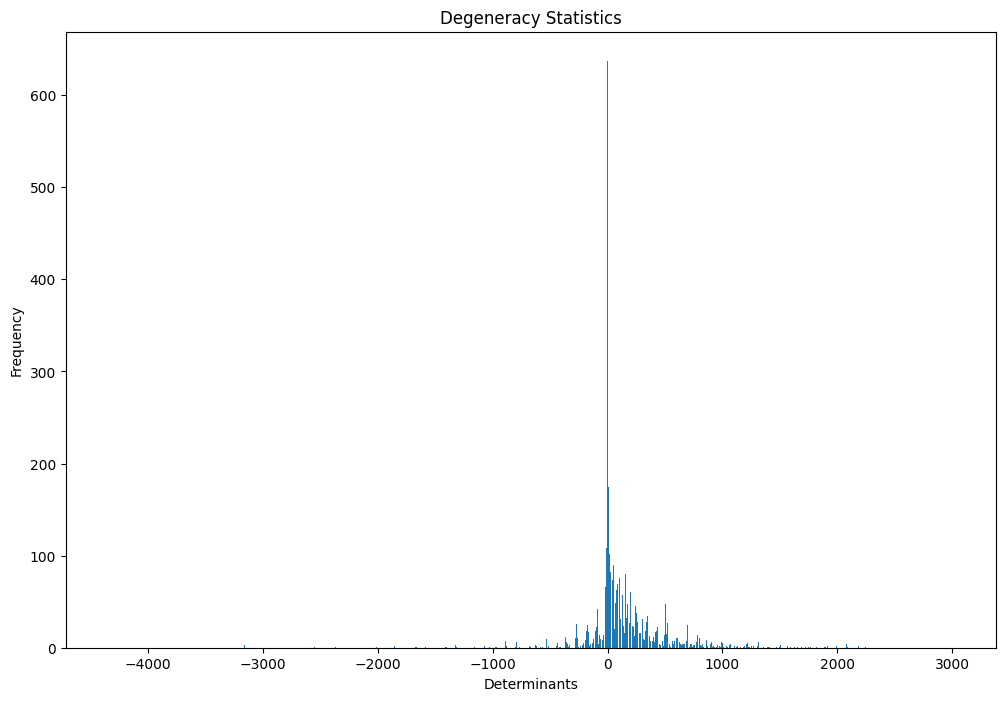

In [24]:
# 使用Counter统计元素频率
element_freq = Counter(det)

# 分解为两个列表，一个用于标签，另一个用于频率
labels, frequencies = zip(*element_freq.items())

# 绘制条形图
plt.figure(figsize=(12, 8)) # 设置图形大小
plt.bar(labels, frequencies)
plt.xlabel('Determinants') # 设置x轴标签
plt.ylabel('Frequency') # 设置y轴标签
plt.title('Degeneracy Statistics') # 设置标题
plt.show()

In [25]:
print(element_freq)

Counter({0: 637, 18: 297, 20: 269, -6: 265, -54: 240, 2: 237, 5: 210, 60: 204, -24: 190, 15: 186, 72: 181, 8: 174, 36: 169, 30: 161, 32: 156, 45: 154, 51: 138, 135: 137, 39: 133, 80: 128, 28: 128, 9: 125, 162: 124, 128: 123, 27: 122, 63: 122, 54: 122, 48: 121, 66: 117, 3: 116, 23: 116, 12: 115, 144: 113, 50: 113, -9: 108, 11: 108, 99: 107, 7: 105, 90: 104, 92: 103, 17: 102, 24: 101, -15: 100, -4: 100, -216: 99, 33: 99, 42: 98, 216: 97, 35: 96, -52: 94, 68: 94, 81: 93, 120: 93, 84: 93, 44: 93, 98: 92, -36: 90, 52: 90, 22: 89, 111: 88, -3: 88, 108: 88, -42: 87, 75: 87, -30: 86, 13: 86, 264: 85, 123: 85, 6: 84, -1: 84, 58: 82, 26: 82, 159: 81, 114: 80, 156: 80, -12: 80, 88: 79, 126: 78, 240: 78, 21: 77, 59: 77, -21: 76, 152: 76, 360: 76, -39: 76, 29: 76, 104: 76, 132: 76, 186: 74, 43: 74, 83: 74, 204: 74, 117: 73, 171: 73, 14: 73, 180: 72, 19: 70, 192: 69, 87: 69, 112: 69, 107: 68, -13: 67, -18: 66, 38: 66, 288: 65, 74: 65, 234: 64, 168: 64, 78: 63, -135: 62, 67: 62, 270: 61, 102: 61, 176

In [26]:


single_occurrence_elements = [element for element, count in element_freq.items() if count == 1]

# 计算只出现一次的元素的数量
number_of_unique_elements = len(single_occurrence_elements)

# 打印结果
print(f"只出现一次的元素数量: {number_of_unique_elements}")
print(f"这些元素分别是: {single_occurrence_elements}")

只出现一次的元素数量: 618
这些元素分别是: [-1899, -2547, -3591, -1485, -1728, -4095, -1491, -4011, -861, 1713, -3510, -3318, -1152, -651, -903, 2093, 2553, -2610, -1818, -2514, -939, -975, -1930, -2010, -2379, -945, -2502, -2550, -2790, -2154, -2646, -1629, 1334, 1263, 1650, 1781, 1937, 1413, 1145, -655, 1526, 1506, 1953, 1839, 1746, 1602, 1338, 1362, 1680, 1169, 1673, -511, -539, 1043, 1235, 1181, 1441, 1379, 2049, 2085, 1547, 1019, 1223, 2173, 2125, 1549, -389, 617, -2946, -1131, 1568, 2088, 2064, 2433, 2505, 1443, 2208, 1818, 1710, 581, -791, 1901, 2409, 2481, 2117, 2753, 2665, 2337, 1747, 2319, 1467, 1776, 1086, 2329, -979, -1671, -1599, -1195, -1743, -807, -672, -1224, -1182, -1014, -576, -1134, -1102, -1526, -1126, -1150, -1110, -768, -610, 1239, -762, -373, -409, -562, -890, 859, 949, 1381, -2031, -2151, -1374, -909, -2395, -3399, -2367, -849, -1533, -1233, -1821, -1806, -810, -2382, -1158, -1438, -2366, -2166, -2670, -1398, -802, -998, -1446, -1662, -224, 773, -2334, -822, -2070, -1226, -1254, 

In [10]:
calculate_determinant("C[C@]1([CH+]C2)CCC2C(C)1C")

Atom "[C@]" contains stereochemical information that will be discarded.


131


131